In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
plt.style.use('seaborn-darkgrid')
#plt.style.use('dark_background')
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=16)
plt.rc('lines', markersize=16)
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 

 


ModuleNotFoundError: No module named 'seaborn'

In [2]:
df = pd.read_csv('covid-variants.csv')
df.head(5)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,7/6/2020,Alpha,0,0.0,3
1,Angola,7/6/2020,B.1.1.277,0,0.0,3
2,Angola,7/6/2020,B.1.1.302,0,0.0,3
3,Angola,7/6/2020,B.1.1.519,0,0.0,3
4,Angola,7/6/2020,B.1.160,0,0.0,3


In [3]:
print(df.isna().sum())
print('Duplicated',df.duplicated().sum())

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64
Duplicated 0


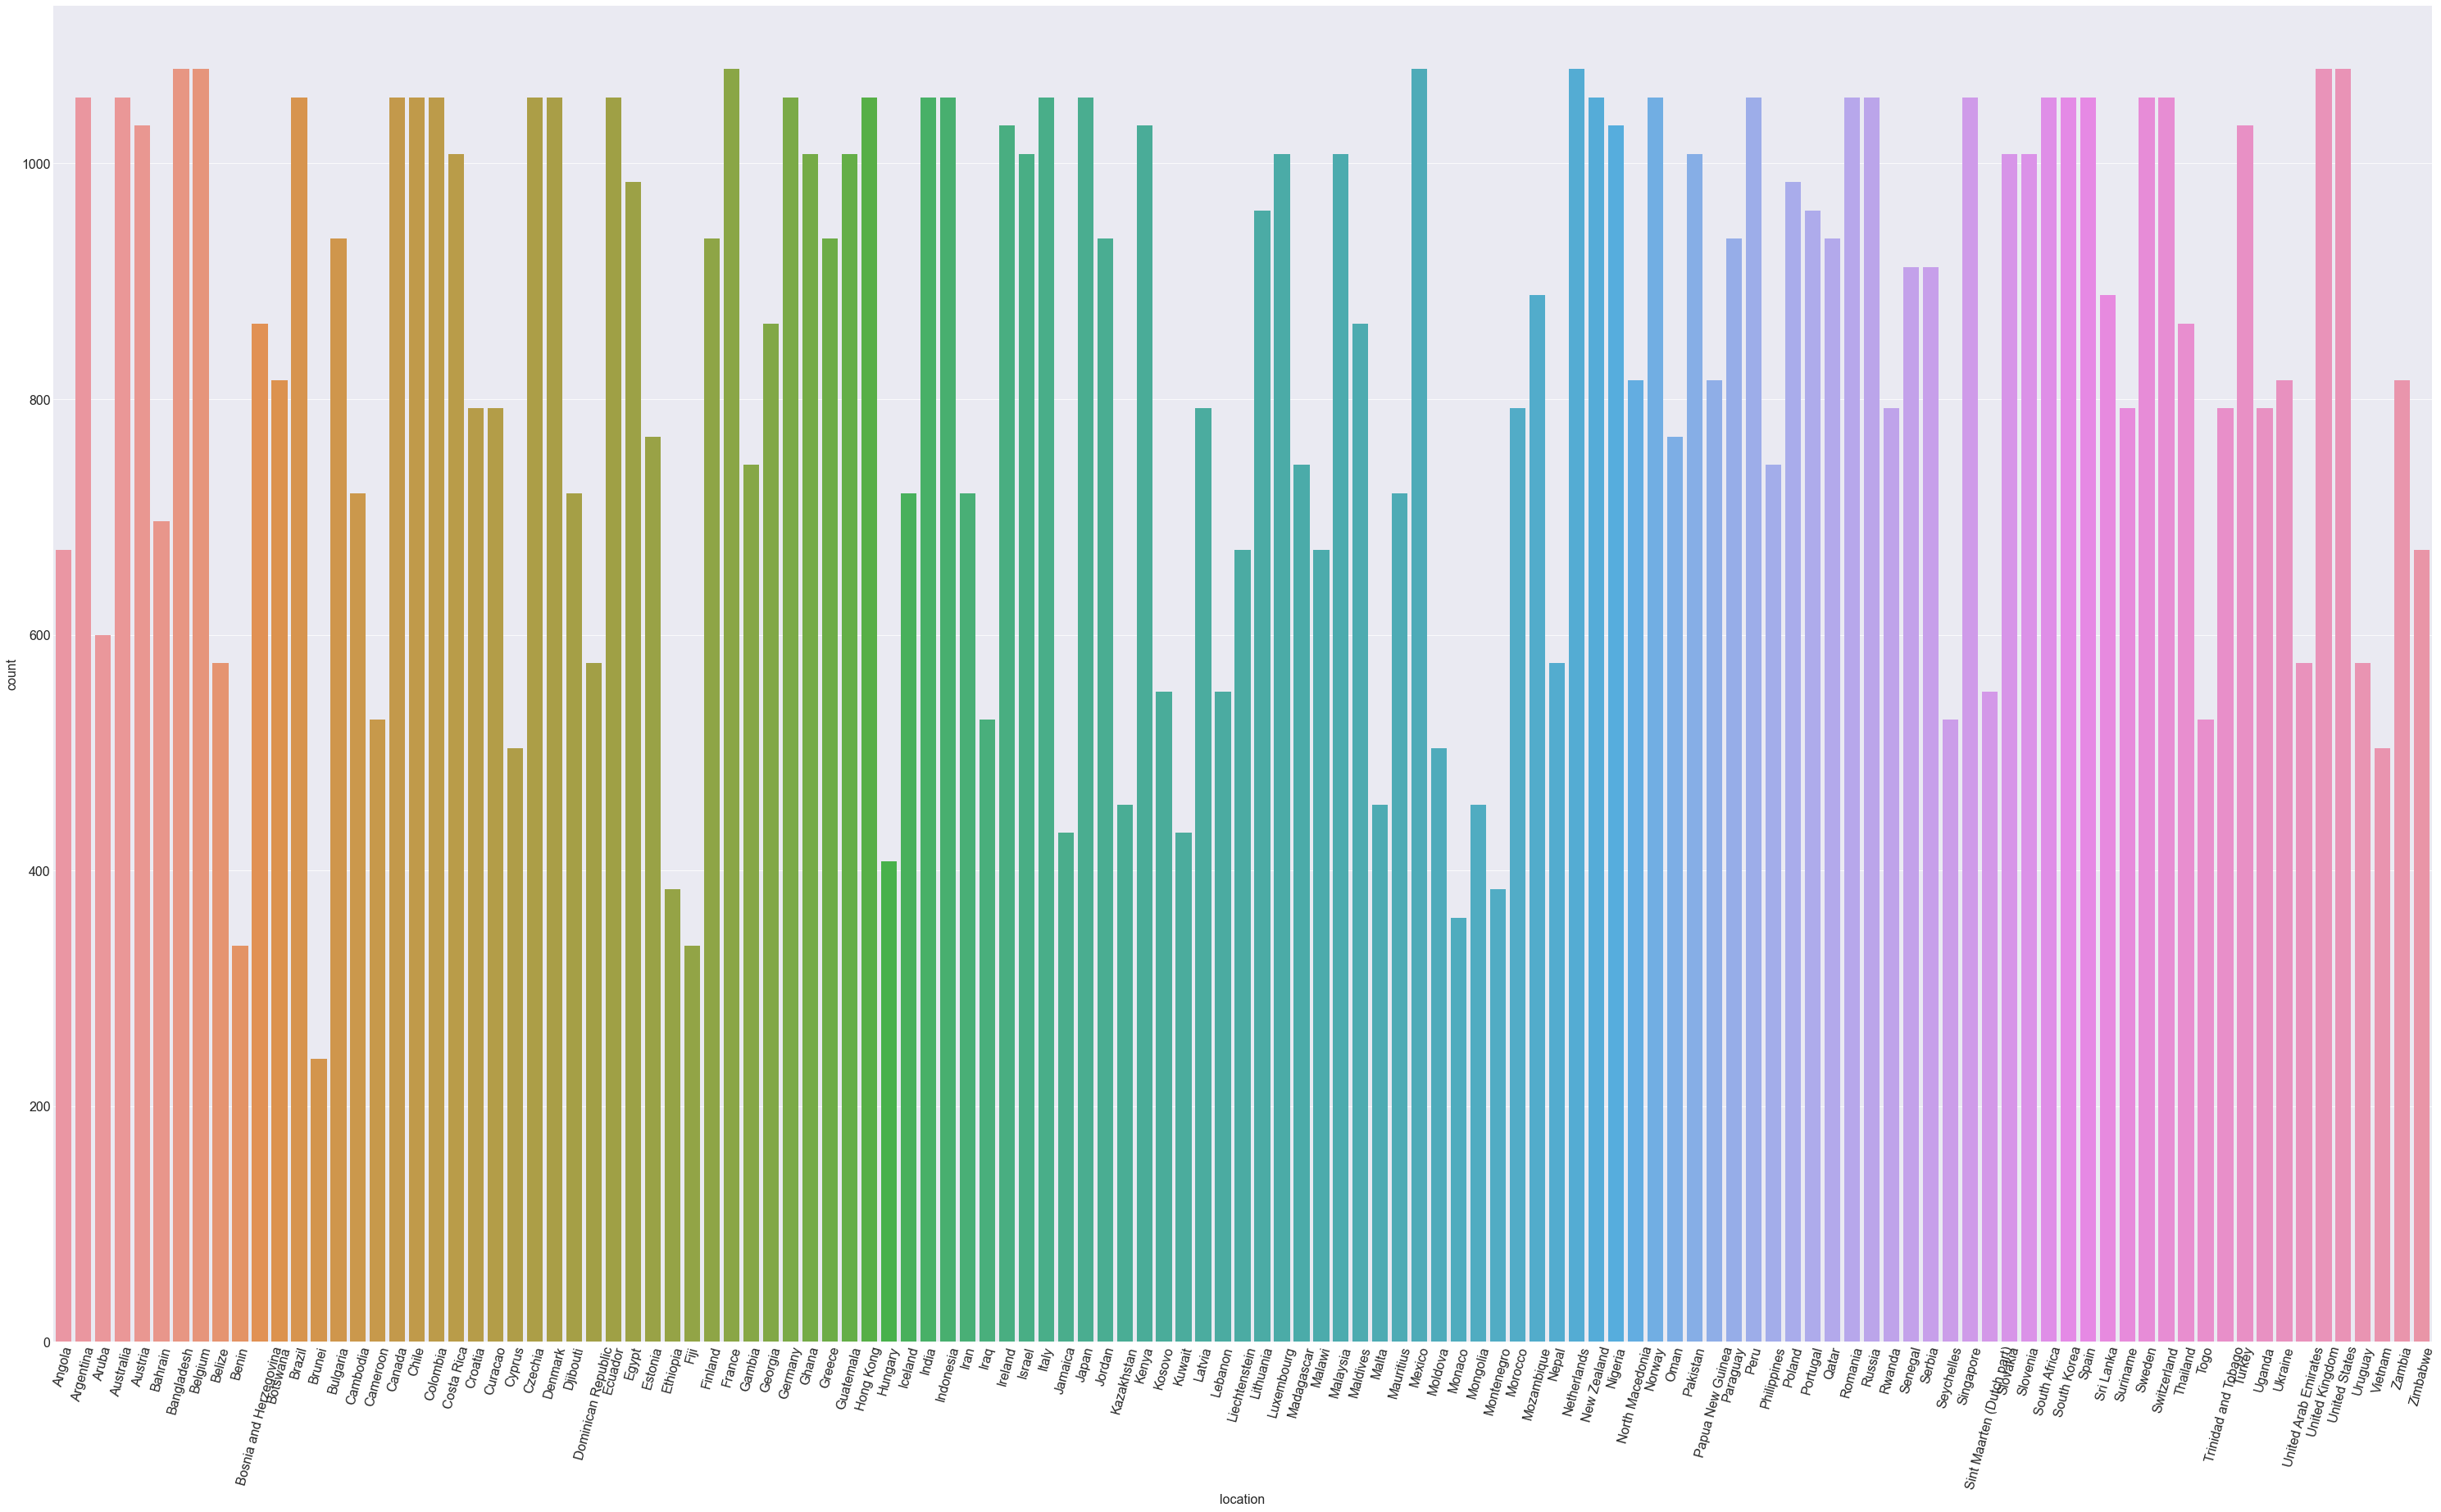

In [6]:
df.groupby(['location']).count()
sns.countplot(df['location'])
plt.xticks(rotation=75)
plt.show()

In [7]:
df.set_index("location", inplace=True)
df


,date,variant,num_sequences,perc_sequences,num_sequences_total
location,,,,,
Angola,7/6/2020,Alpha,0,0.0,3
Angola,7/6/2020,B.1.1.277,0,0.0,3
Angola,7/6/2020,B.1.1.302,0,0.0,3
Angola,7/6/2020,B.1.1.519,0,0.0,3
Angola,7/6/2020,B.1.160,0,0.0,3
...,...,...,...,...,...
Zimbabwe,11/1/2021,Omicron,0,0.0,6
Zimbabwe,11/1/2021,S:677H.Robin1,0,0.0,6
Zimbabwe,11/1/2021,S:677P.Pelican,0,0.0,6


In [21]:
df_all = df.loc[['United States', 'Canada','Germany','Sweden']]


df_us = df.loc[['United States']]
df_can = df.loc[['Canada']]
df_ger = df.loc[['Germany']]
df_swe = df.loc[['Sweden']]

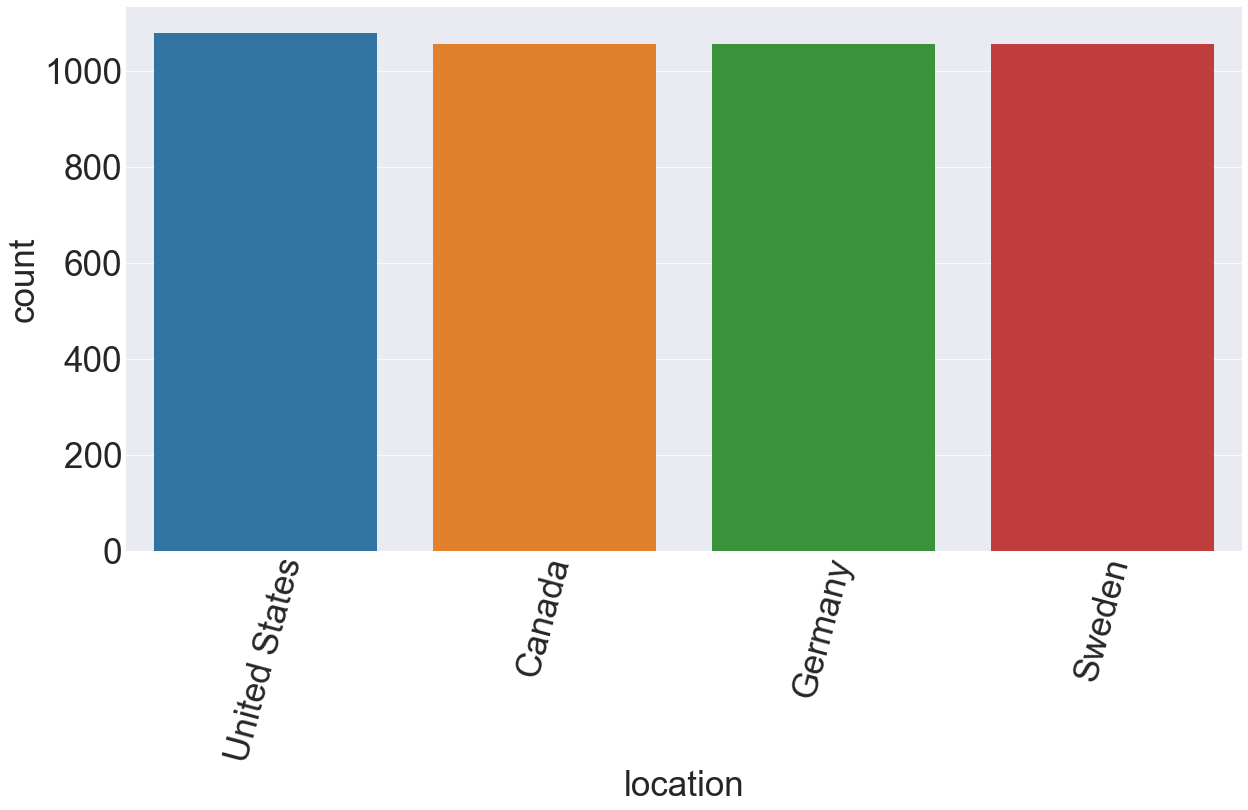

In [58]:
df_all.reset_index(inplace=True)
df_all.groupby('location').count()
sns.countplot(df_all['location'])
plt.xticks(rotation=75)
plt.rc('figure', figsize=(20,10))
plt.rc('font', size=35)
plt.rc('lines', markersize=22)







plt.show()
 
 

In [37]:
# Group Each Country by location and date together
sum_all_df = df_all.groupby(['location','date']).agg({'num_sequences_total': 'sum'})
sum_us_df = df_us.groupby(['location','date']).agg({'num_sequences_total': 'sum'})
sum_ger_df = df_ger.groupby(['location','date']).agg({'num_sequences_total': 'sum'}) 
sum_can_df = df_can.groupby(['location','date']).agg({'num_sequences_total': 'sum'})
sum_swe_df = df_swe.groupby(['location','date']).agg({'num_sequences_total': 'sum'})

 


In [1]:
n=178
r = np.arange(n)
width = 0.25


# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=6)
plt.rc('lines', markersize=16) 
sum_all_df.plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences All Countries')
plt.ylabel("Cases Reported (000)") 
#plt.xticks(r + width/4,['Canada','Germany','Sweden','United States'])
plt.legend()

NameError: name 'np' is not defined

Text(0, 0.5, 'Cases Reported (000)')

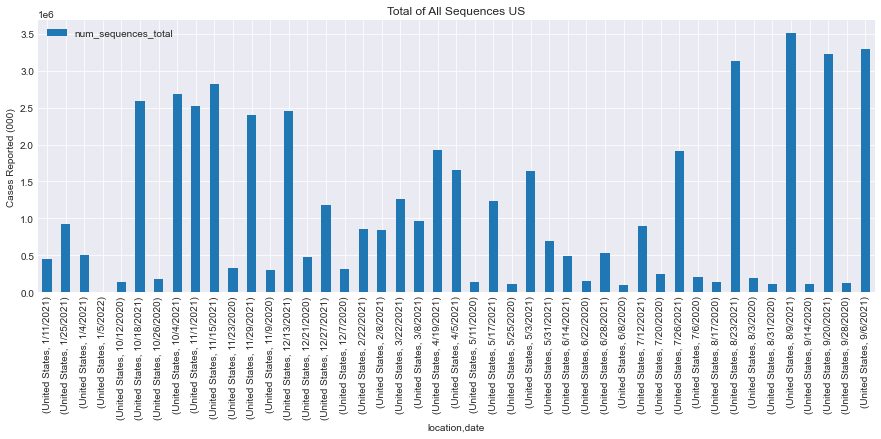

In [30]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_us_df.plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences US')
plt.ylabel("Cases Reported (000)") 

Text(0, 0.5, 'Cases Reported (000)')

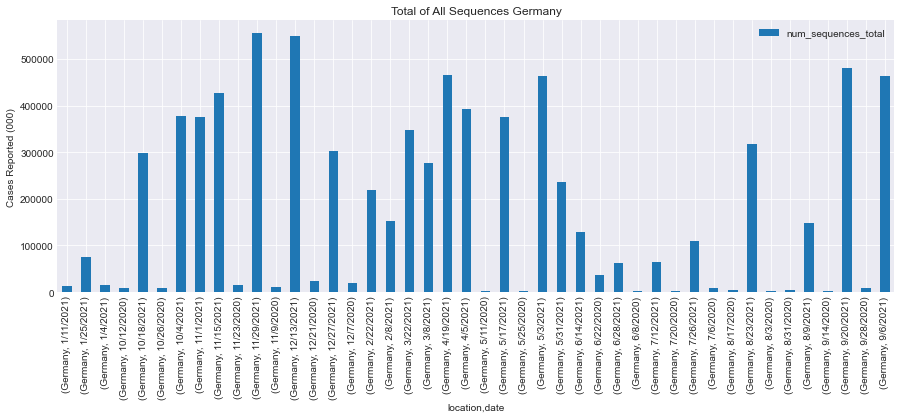

In [31]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_ger_df.plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences Germany')
plt.ylabel("Cases Reported (000)") 

Text(0, 0.5, 'Cases Reported (000)')

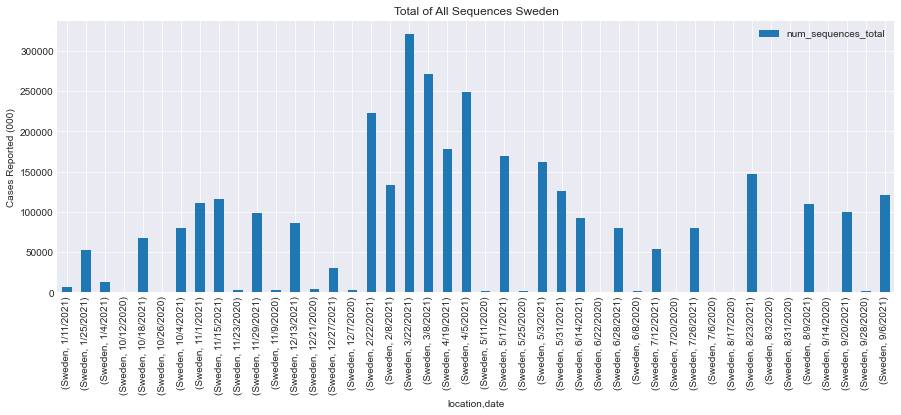

In [32]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_swe_df.plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences Sweden')
plt.ylabel("Cases Reported (000)") 

Text(0, 0.5, 'Cases Reported (000)')

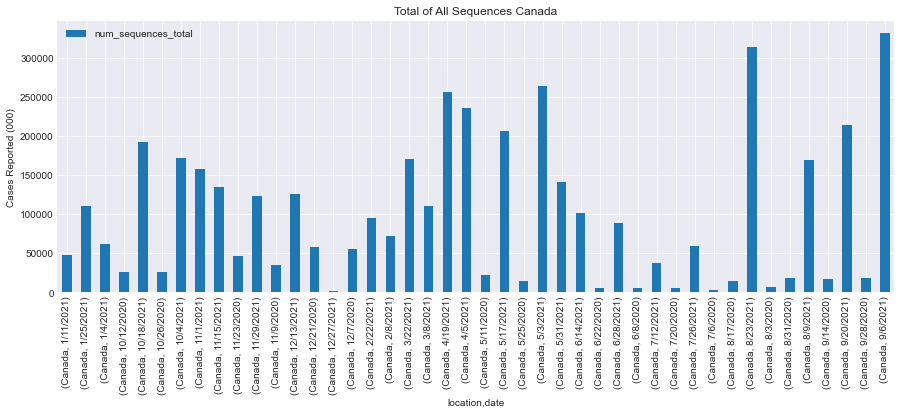

In [33]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_can_df.plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences Canada')
plt.ylabel("Cases Reported (000)") 

In [35]:
# Put treatments into a list for for loop (and later for plot labels)
 
country_list= ["United States","Canada","Germany","Sweden"]
 
# Create empty list to fill with tumor vol data (for plotting)
country_data = []
 

# Locate the rows which contain mice on each drug and get the tumor volumes

master_df = pd.DataFrame(df_all)
    
def get_info(parameter, measurement, col):
    df = master_df.loc[master_df[col] == parameter, :]
    return df[measurement]

 
for country in country_list:
    country_data.append(get_info(country,"Tumor Volume (mm3)", "Drug Regimen"))
    